In [1]:
# prompt: code to start importing datasets from kaggle api
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:09<00:00, 170MB/s]
100% 1.06G/1.06G [00:09<00:00, 116MB/s]


In [3]:
# prompt: import zipfile and write code to unpack the dog-vs-cat.zip

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [4]:
# prompt: import tensorflow, keras, Sequential,Conv2D. Dense,Maxpooling.Flatten

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten,BatchNormalization, Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels ='inferred',
    label_mode ='int',
    batch_size=32,
    image_size =(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels = 'inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize
def process(image,label):
  image =tf.cast(image/255.0,tf.float32)
  return image , label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),activation ='relu',padding ='valid', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(3,3),strides = 2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation ='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer ='adam', loss= 'binary_crossentropy',metrics='accuracy')

In [10]:
history =model.fit(train_ds,epochs=10,validation_data =validation_ds)

Epoch 1/10
625/625 [==============================] - 63s 88ms/step - loss: 0.6085 - accuracy: 0.6604 - val_loss: 0.4885 - val_accuracy: 0.7608
Epoch 2/10
625/625 [==============================] - 58s 92ms/step - loss: 0.4645 - accuracy: 0.7773 - val_loss: 0.4637 - val_accuracy: 0.7904
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.3690 - accuracy: 0.8336 - val_loss: 0.4543 - val_accuracy: 0.8152
Epoch 4/10
625/625 [==============================] - 60s 96ms/step - loss: 0.2590 - accuracy: 0.8887 - val_loss: 0.5267 - val_accuracy: 0.8154
Epoch 5/10
625/625 [==============================] - 56s 88ms/step - loss: 0.1534 - accuracy: 0.9375 - val_loss: 0.7067 - val_accuracy: 0.8012
Epoch 6/10
625/625 [==============================] - 57s 89ms/step - loss: 0.0928 - accuracy: 0.9661 - val_loss: 0.8612 - val_accuracy: 0.8072
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0640 - accuracy: 0.9775 - val_loss: 0.9579 - val_accuracy:

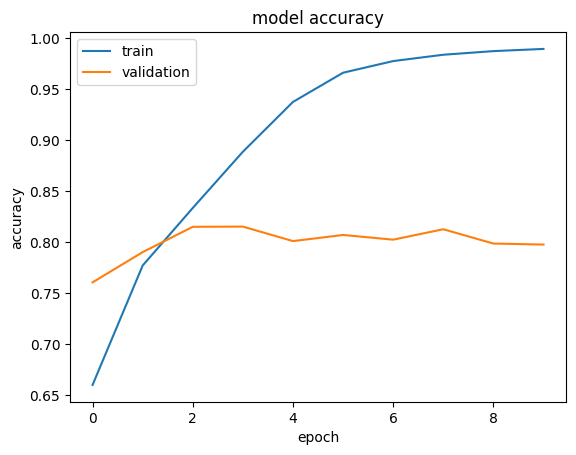

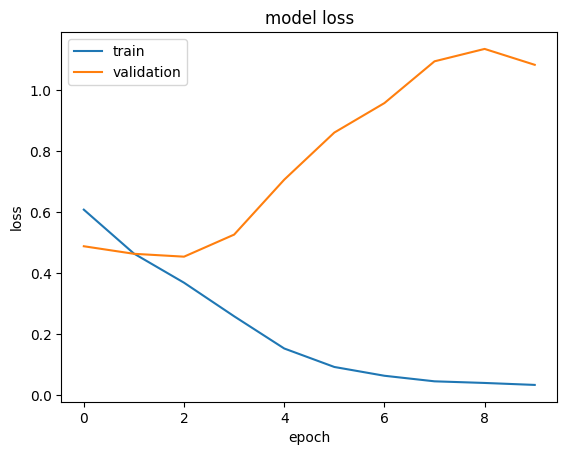

In [11]:
# prompt: import pyplot

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

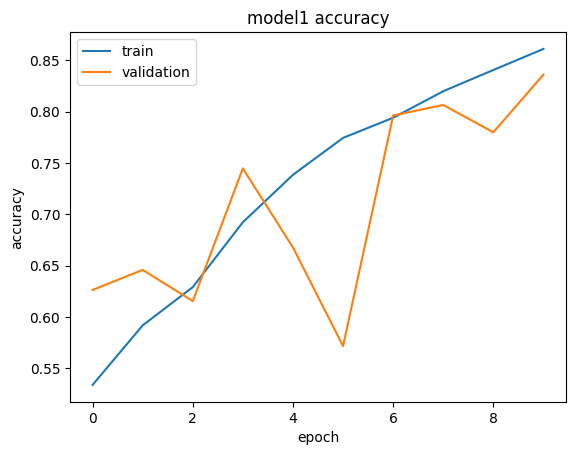

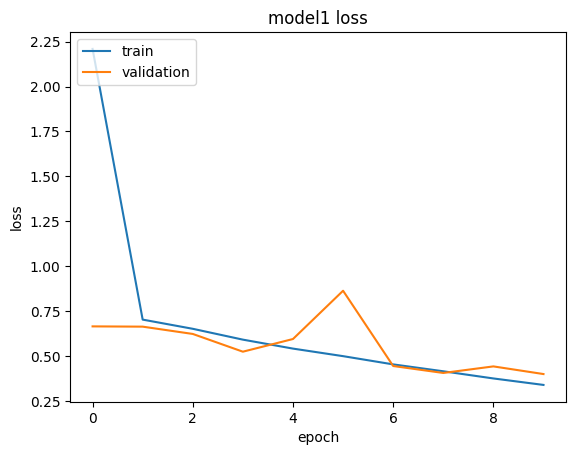

In [12]:
# prompt: rewrite only the model and name it history1 to improve the model performsnce by adding BatchNormalization and Dropout layer use existing data

model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model1.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))

model1.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.4))

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1, activation='sigmoid'))
model1.summary()

model1.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

history1 = model1.fit(train_ds, epochs=10, validation_data=validation_ds)

# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
